<a href="https://colab.research.google.com/github/Fedryus/Ejercicios-IA/blob/master/KERAS_RegresionLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

# Regresión lineal usando el dataset de presión sanguínea vs. edad y usando la
# librería Keras.
# Tomado de: http://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%tensorflow_version 1.14



`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [4]:
from keras.models import Sequential #contenedor secuencial de capas
from keras.layers.core import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [5]:
datos= pd.read_csv("dataset.csv", sep=",", skiprows=32, usecols=[2,3])
print(datos)


    Age  Systolic blood pressure
0    39                      144
1    45                      138
2    47                      145
3    65                      162
4    46                      142
5    67                      170
6    42                      124
7    67                      158
8    56                      154
9    64                      162
10   56                      150
11   59                      140
12   34                      110
13   42                      128
14   48                      130
15   45                      135
16   17                      114
17   20                      116
18   19                      124
19   36                      136
20   50                      142
21   39                      120
22   21                      120
23   44                      160
24   53                      158
25   63                      144
26   29                      130
27   25                      125
28   69                      175


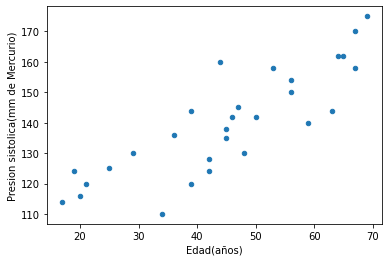

In [6]:
datos.plot.scatter(x="Age",y="Systolic blood pressure")
plt.xlabel("Edad(años)")
plt.ylabel("Presion sistolica(mm de Mercurio)")
plt.show()

In [0]:
x= datos["Age"].values
y= datos["Systolic blood pressure"].values

In [0]:
#
# Construir el modelo en Keras
#
# - Capa de entrada: 1 dato (cada dato "x" correspondiente a la edad)
# - Capa de salida: 1 dato (cada dato "y" correspondiente a la regresión lineal)
# - Activación: 'linear' (pues se está implementando la regresión lineal)


In [0]:
np.random.seed() #Para reproducir ele xperimento

In [0]:
input_dim=1
output_dim=1
modelo= Sequential() # CREO MI MODELO 
modelo.add(Dense(output_dim,input_dim=input_dim,activation="linear"))

In [0]:
sgd= SGD(lr=0.0004)
modelo.compile(loss="mse", optimizer=sgd) #Compile define el optimizador y funcion de costo de mi modelo
#MSE= ERROR CUADRATICO MEDIO

In [0]:
#TRAIN
num_epochs = 40000
batch_size = x.shape[0] #como es pequeño le meto todo de una (osea todo x)
history = modelo.fit(x, y, epochs=num_epochs, batch_size=batch_size, verbose=0) #verbose permite imprimir el valor de las iteraciones. 0 significa que no quiero imprimir

In [29]:
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Parámetros: w = 1.0, b = 93.5


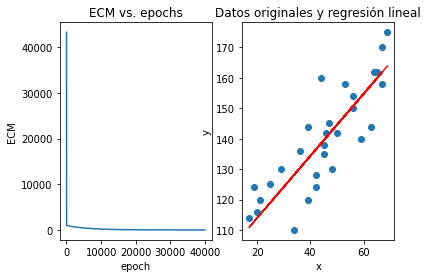

In [30]:
#
# Visualizar resultados del entrenamiento
#

# Imprimir los coeficientes "w" y "b"
capas = modelo.layers[0]
w, b = capas.get_weights()
print('Parámetros: w = {:.1f}, b = {:.1f}'.format(w[0][0],b[0]))

# Graficar el error vs epochs y el resultado de la regresión
# superpuesto a los datos originales
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.title('ECM vs. epochs')

y_regr = modelo.predict(x)
plt.subplot(1, 2, 2)
plt.scatter(x,y)
plt.plot(x,y_regr,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos originales y regresión lineal')
plt.show()


In [34]:
# PREDICCION

x_pred= np.array([90])
y_pred = modelo.predict(x_pred)

print(y_pred)

[[185.34038]]
